In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage
from PIL import Image
import pandas as pd
from scipy.fft import fft2, fftshift, ifft2, ifftshift

In [6]:
camera = skimage.data.camera()

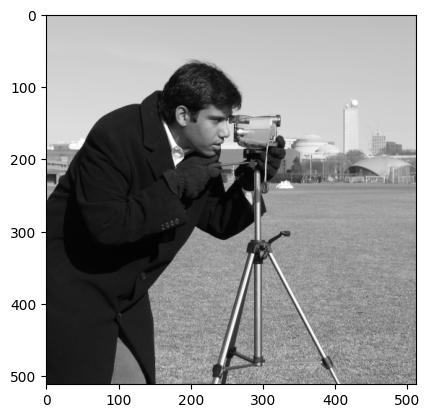

In [49]:
plt.imshow(camera, cmap='gray')

In [10]:
img = camera.copy()

In [104]:
img_freq = fft2(img)

img_freq_result = img_freq.copy()


img_freq[np.log(np.abs(img_freq) + 1) < 10] = 0

freq_unshifted_to_center = ifftshift(img_freq)
image_denoised = ifft2(img_freq).real
image_denoised_clipped = np.clip(image_denoised, 0, 255)

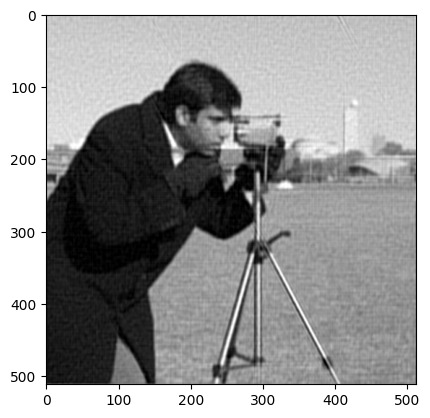

In [105]:
plt.imshow(image_denoised_clipped, cmap='gray')

In [13]:
calulate_image_MAE(camera, image_denoised_clipped)

83487.40875787719

In [44]:
img2 = camera.copy()
img_freq = fft2(img2)
img_shifted = fftshift(img_freq)

rows, cols = img_shifted.shape
crow, ccol = rows // 2, cols // 2


img_shifted[crow - 50: crow + 50, ccol - 50:ccol + 50] = 1
img_unshifted = np.fft.ifftshift(img_shifted)

img_unfreq = ifft2(img_unshifted)
img_unfreq = np.abs(img_unfreq)

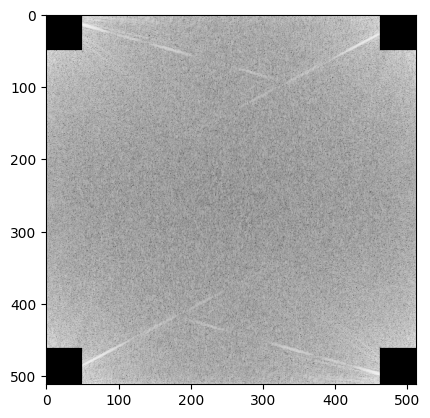

In [53]:
plt.imshow(np.log(np.abs(img_unshifted) + 1), cmap='gray')

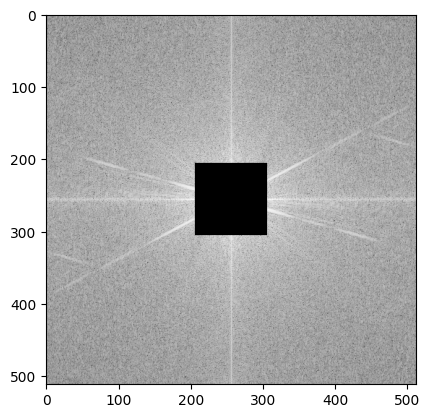

In [54]:
plt.imshow(np.log(np.abs(img_shifted) + 1), cmap='gray')

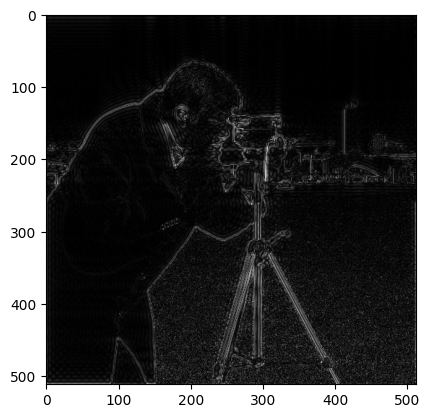

In [55]:
plt.imshow(img_unfreq, cmap='gray')

In [75]:
def simple_image_compression(image: np.array, ratio: float) -> np.array:
  img_freq = fft2(img)

  img_freq_result = img_freq.copy()

  max = np.max(np.log(np.abs(img_freq)))
  thresh = ratio * max
  print(thresh)

  img_freq[np.log(np.abs(img_freq) + 1) < thresh] = 0

  freq_unshifted_to_center = ifftshift(img_freq)
  image_denoised = ifft2(img_freq).real
  image_denoised_clipped = np.clip(image_denoised, 0, 255)
  return image_denoised_clipped

10.402159373487537


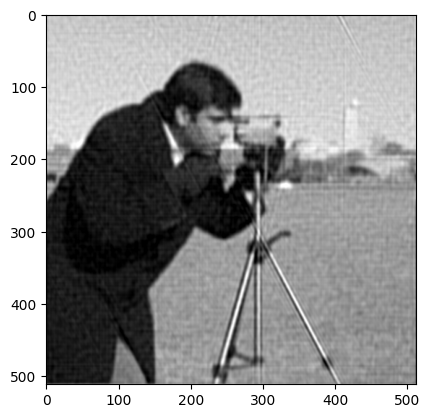

In [107]:
plt.imshow(simple_image_compression(camera, 0.6), cmap='gray')

In [121]:
def image_compression(image: np.array, keep) -> np.array:
  img_freq = fft2(image)
  img_freq_magnitude = np.abs(img_freq)
  img_freq_sorted = np.sort(img_freq_magnitude.flatten())


  thresh = img_freq_sorted[int((1 - keep) * len(img_freq_sorted))]

  mask = img_freq_magnitude > thresh

  img_freq_compressed = img_freq * mask

  img_compressed = np.abs(ifft2(img_freq_compressed))

  return img_compressed

In [131]:
camera_compressed = image_compression(camera, 0.01)

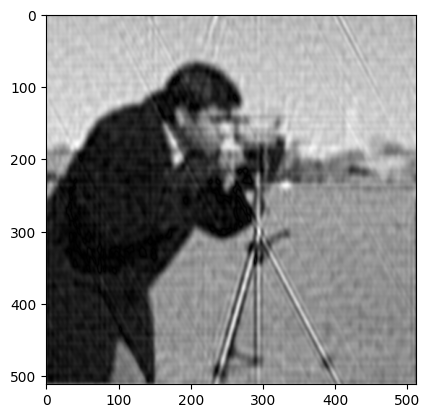

In [132]:
plt.imshow(camera_compressed, cmap="gray")

In [118]:
def channel_division_for_denosing(image: np.array, denoising_function: callable, *args, **kwargs) -> np.array:
  result = np.zeros(image.shape, dtype=int)
  for i in range(3):
      result[:, :, i] = denoising_function(image[:, :, i], *args)
  return np.asarray(result)

In [124]:
image_converted = channel_division_for_denosing(skimage.data.astronaut(), image_compression, 0.05)

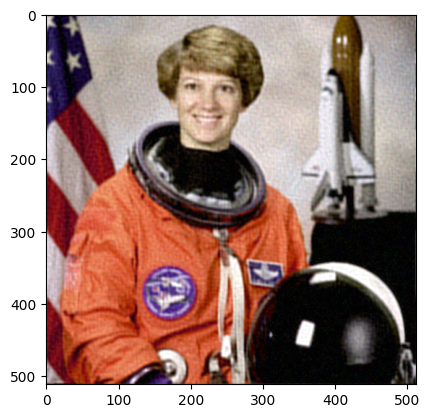

In [125]:
plt.imshow(image_converted)